In [3]:
import sys
import os
sys.path.insert(0, './../../DataAndScripts/structured_scripts')

In [8]:
import pickle
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator
import seaborn as sns
sns.set_style("whitegrid")

import data_analysis as da

# Plot Comparison between Structured and Unstructured Networks

In [5]:
data=da.Data_MonkeyMouse('both','./../../DataAndScripts/experimental_data')

In [6]:
with open("./structured_model/Struct-Model-Family"+'.pkl', 'rb') as handle:
    mod_fam_dict = pickle.load(handle)
    best_idxs = {}
    for anim_idx in range(2):
        preds = mod_fam_dict['preds'][anim_idx][[r'$r_{base}$',r'$r_{opto}$',
                                                 r'$\sigma_{r_{base}}$',r'$\sigma_{r_{opto}}$',
                                                 r'$\sigma_{\Delta r}$',r'$\rho$']].to_numpy()
        dataset = data.bootstrap_moments[anim_idx]
        res = (preds-dataset[:,-1,0])/dataset[:,-1,1]
        loss = np.sum(res**2,axis=1)
        best_idxs[anim_idx] = np.argsort(loss)[:10]

In [9]:
with open("./structured_model/Struct-Model-Family"+'.pkl', 'rb') as handle:
    mod_fam_dict = pickle.load(handle)
    struct_preds = pd.concat((mod_fam_dict['preds'][0].iloc[best_idxs[0]],
                              mod_fam_dict['preds'][1].iloc[best_idxs[1]]),ignore_index=True)
    struct_preds[r'$\Delta r$'] = struct_preds[r'$r_{opto}$']-struct_preds[r'$r_{base}$']
    struct_preds[r'$\mathrm{balance\ index}$'] = struct_preds[r'$\beta_{E+I,VSM}$']
    struct_preds[r'$\mathrm{log}_{10}(\mathrm{balance\ index})$'] = np.log10(struct_preds[r'$\beta_{E+I,VSM}$'])
    struct_preds[r'$\mathrm{log}_{10}(\mathrm{opto/exc\ input})$'] = np.log10(struct_preds[r'$OIR_{E+I,VSM}$'])
    struct_preds[r'$\mathrm{log}_{10}(|\mu_{X\to E}|)$'] = np.log10(10**3*np.abs(struct_preds[r'$\mu_{X\to E,VSM}$']))
    struct_preds[r'$\mathrm{log}_{10}(|\mu_{E\to E}|)$'] = np.log10(10**3*np.abs(struct_preds[r'$\mu_{E\to E,VSM}$']))
    struct_preds[r'$\mathrm{log}_{10}(|\mu_{I\to E}|)$'] = np.log10(10**3*np.abs(struct_preds[r'$\mu_{I\to E,VSM}$']))
    struct_preds[r'$\mathrm{log}_{10}(|\mu_{X\to I}|)$'] = np.log10(10**3*np.abs(struct_preds[r'$\mu_{X\to I,VSM}$']))
    struct_preds[r'$\mathrm{log}_{10}(|\mu_{E\to I}|)$'] = np.log10(10**3*np.abs(struct_preds[r'$\mu_{E\to I,VSM}$']))
    struct_preds[r'$\mathrm{log}_{10}(|\mu_{I\to I}|)$'] = np.log10(10**3*np.abs(struct_preds[r'$\mu_{I\to I,VSM}$']))
    struct_preds['Animal'] = ['mouse']*10 + ['monkey']*10
    struct_preds[r'$\mathrm{balance\ index}$'][(struct_preds['Animal'] == 'mouse')] = struct_preds[r'$\beta_{E+I,all}$'][(struct_preds['Animal'] == 'mouse')]
    struct_preds[r'$\mathrm{log}_{10}(\mathrm{balance\ index})$'][(struct_preds['Animal'] == 'mouse')] = np.log10(struct_preds[r'$\beta_{E+I,all}$'][(struct_preds['Animal'] == 'mouse')])
    struct_preds[r'$\mathrm{log}_{10}(\mathrm{opto/exc\ input})$'][(struct_preds['Animal'] == 'mouse')] = np.log10(struct_preds[r'$OIR_{E+I,all}$'][(struct_preds['Animal'] == 'mouse')])
    struct_preds[r'$\mathrm{log}_{10}(|\mu_{X\to E}|)$'][(struct_preds['Animal'] == 'mouse')] = np.log10(10**3*np.abs(struct_preds[r'$\mu_{X\to E,all}$'][(struct_preds['Animal'] == 'mouse')]))
    struct_preds[r'$\mathrm{log}_{10}(|\mu_{E\to E}|)$'][(struct_preds['Animal'] == 'mouse')] = np.log10(10**3*np.abs(struct_preds[r'$\mu_{E\to E,all}$'][(struct_preds['Animal'] == 'mouse')]))
    struct_preds[r'$\mathrm{log}_{10}(|\mu_{I\to E}|)$'][(struct_preds['Animal'] == 'mouse')] = np.log10(10**3*np.abs(struct_preds[r'$\mu_{I\to E,all}$'][(struct_preds['Animal'] == 'mouse')]))
    struct_preds[r'$\mathrm{log}_{10}(|\mu_{X\to I}|)$'][(struct_preds['Animal'] == 'mouse')] = np.log10(10**3*np.abs(struct_preds[r'$\mu_{X\to I,all}$'][(struct_preds['Animal'] == 'mouse')]))
    struct_preds[r'$\mathrm{log}_{10}(|\mu_{E\to I}|)$'][(struct_preds['Animal'] == 'mouse')] = np.log10(10**3*np.abs(struct_preds[r'$\mu_{E\to I,all}$'][(struct_preds['Animal'] == 'mouse')]))
    struct_preds[r'$\mathrm{log}_{10}(|\mu_{I\to I}|)$'][(struct_preds['Animal'] == 'mouse')] = np.log10(10**3*np.abs(struct_preds[r'$\mu_{I\to I,all}$'][(struct_preds['Animal'] == 'mouse')]))
    struct_pred_labels = mod_fam_dict['pred_labels']
    print(mod_fam_dict)

{'params': [       $G_I$      $g_E$     $g_I$   $\beta$    $CV_K$  $S_{l,E}$  $S_{l,I}$  \
0   1.238450   9.014741  6.037319  1.277186  0.000303   0.773792   0.622918   
1   1.294639   4.709961  3.121001  1.095035  0.003313   1.017665   1.786210   
2   1.382466   7.087023  3.886997  0.474850  0.107622   0.520823   0.602521   
3   1.405932   8.587810  5.901596  1.539899  0.000304   0.828308   0.609843   
4   1.415500   8.364464  6.879352  1.416527  0.000329   0.834605   0.538727   
5   1.463305   8.454570  5.854147  1.447171  0.000337   0.797570   0.634968   
6   1.482610   6.282845  4.177871  0.431510  0.098737   0.541932   0.615406   
7   1.494414   7.927584  3.412423  0.234720  0.265797   0.211064   0.224368   
8   1.506057   8.050609  5.594478  1.536684  0.000307   0.909725   0.597448   
9   1.510125   5.496848  4.766642  0.467285  0.013778   1.085256   0.825733   
10  1.535800   6.261120  4.117196  0.381314  0.081814   0.612572   0.536704   
11  1.541431   7.791210  4.459998  0.446

In [10]:
with open("./unstructured/Unstruct-Model-Family"+'.pkl', 'rb') as handle:
    mod_fam_dict = pickle.load(handle)
    unstruct_preds = pd.concat((mod_fam_dict['preds'][0],mod_fam_dict['preds'][1]),ignore_index=True)
    unstruct_preds[r'$\Delta r$'] = unstruct_preds[r'$r_{opto}$']-unstruct_preds[r'$r_{base}$']
    unstruct_preds[r'$\mathrm{balance\ index}$'] = unstruct_preds[r'$\beta_{E+I}$']
    unstruct_preds[r'$\mathrm{log}_{10}(\mathrm{balance\ index})$'] = np.log10(unstruct_preds[r'$\beta_{E+I}$'])
    unstruct_preds[r'$\mathrm{log}_{10}(|\mu_{X\to E}|)$'] = np.log10(10**3*np.abs(unstruct_preds[r'$\mu_{X\to E}$']))
    unstruct_preds[r'$\mathrm{log}_{10}(|\mu_{E\to E}|)$'] = np.log10(10**3*np.abs(unstruct_preds[r'$\mu_{E\to E}$']))
    unstruct_preds[r'$\mathrm{log}_{10}(|\mu_{I\to E}|)$'] = np.log10(10**3*np.abs(unstruct_preds[r'$\mu_{I\to E}$']))
    unstruct_preds[r'$\mathrm{log}_{10}(|\mu_{X\to I}|)$'] = np.log10(10**3*np.abs(unstruct_preds[r'$\mu_{X\to I}$']))
    unstruct_preds[r'$\mathrm{log}_{10}(|\mu_{E\to I}|)$'] = np.log10(10**3*np.abs(unstruct_preds[r'$\mu_{E\to I}$']))
    unstruct_preds[r'$\mathrm{log}_{10}(|\mu_{I\to I}|)$'] = np.log10(10**3*np.abs(unstruct_preds[r'$\mu_{I\to I}$']))
    unstruct_preds['Animal'] = ['mouse']*len(mod_fam_dict['preds'][0]) + ['monkey']*len(mod_fam_dict['preds'][1])
    unstruct_pred_labels = mod_fam_dict['pred_labels']
    print(mod_fam_dict)

{'params': [       $g_E$     $g_I$   $\beta$    $CV_K$  $CV_\lambda$       $J$      $r_X$  \
0   3.181804  2.013076  0.779143  0.031419      0.402657  0.001006   3.702538   
1   3.592476  3.045290  0.127445  0.001398      3.550315  0.000051  27.056150   
2   4.009181  3.171712  0.123976  0.003500      1.408281  0.000040  26.216464   
3   4.468420  3.747309  0.179027  0.000383      4.616315  0.000033  25.561676   
4   6.527043  5.861966  0.230698  0.022233      1.692504  0.000057  15.168182   
5   6.843389  6.068208  0.168177  0.001911      2.403225  0.000021  18.723698   
6   8.140221  4.962473  0.131762  0.092643      3.368583  0.000040  12.696419   
7   8.460476  7.895764  0.277800  0.003432      8.815368  0.000051  13.904026   
8   8.633981  5.344366  0.127662  0.001445      1.210411  0.000012  22.371680   
9   8.832584  6.033706  0.151980  0.006088      1.523843  0.000031  15.263411   
10  9.179299  5.740899  0.125646  0.001338      4.106568  0.000013  21.155844   

         $L$  


In [11]:
comb_preds = pd.concat((unstruct_preds[[r'$\Delta r$',r'$\rho$',r'$\sigma_{\Delta r}$',
    r'$\mathrm{balance\ index}$',r'$\mathrm{log}_{10}(\mathrm{balance\ index})$',
    r'$\mathrm{log}_{10}(|\mu_{X\to E}|)$',r'$\mathrm{log}_{10}(|\mu_{E\to E}|)$',
    r'$\mathrm{log}_{10}(|\mu_{I\to E}|)$',r'$\mathrm{log}_{10}(|\mu_{X\to I}|)$',
    r'$\mathrm{log}_{10}(|\mu_{E\to I}|)$',r'$\mathrm{log}_{10}(|\mu_{I\to I}|)$']],
                       struct_preds[[r'$\Delta r$',r'$\rho$',r'$\sigma_{\Delta r}$',
    r'$\mathrm{balance\ index}$',r'$\mathrm{log}_{10}(\mathrm{balance\ index})$',
    r'$\mathrm{log}_{10}(|\mu_{X\to E}|)$',r'$\mathrm{log}_{10}(|\mu_{E\to E}|)$',
    r'$\mathrm{log}_{10}(|\mu_{I\to E}|)$',r'$\mathrm{log}_{10}(|\mu_{X\to I}|)$',
    r'$\mathrm{log}_{10}(|\mu_{E\to I}|)$',r'$\mathrm{log}_{10}(|\mu_{I\to I}|)$']]),
                       ignore_index=True)
comb_preds['Animal'] = ['Unstructured Mouse']*np.count_nonzero(unstruct_preds['Animal'] == 'mouse') +\
                        ['Unstructured Monkey']*np.count_nonzero(unstruct_preds['Animal'] == 'monkey') +\
                        ['Structured Mouse']*np.count_nonzero(struct_preds['Animal'] == 'mouse') +\
                        ['Structured Monkey']*np.count_nonzero(struct_preds['Animal'] == 'monkey')

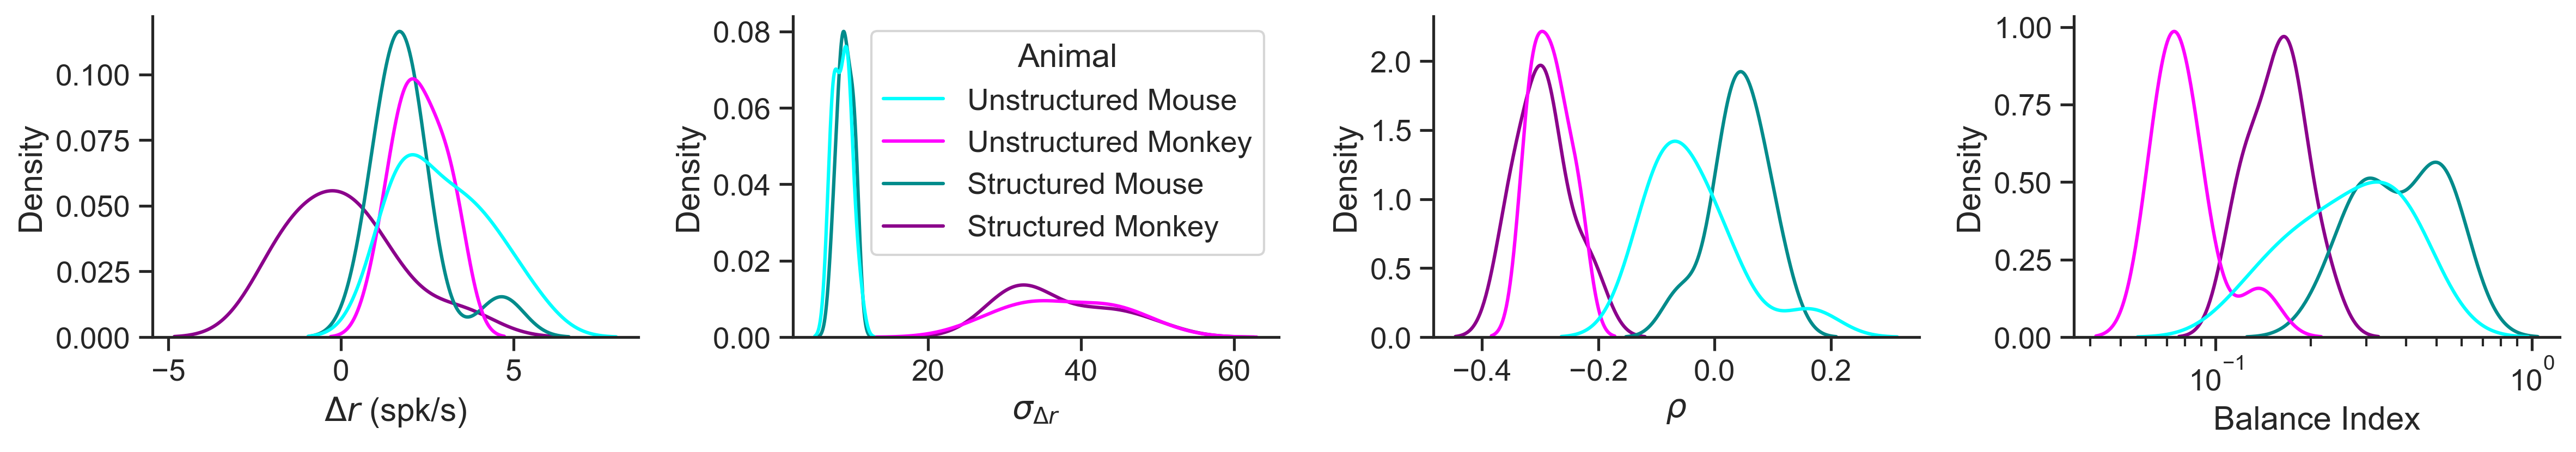

In [13]:
sns.set(font_scale=1.2,style='ticks')

cols = 4
rows = 1
colors=['cyan','magenta','darkcyan','darkmagenta']
color_sim=['xkcd:aqua','xkcd:coral']
fig, axs = plt.subplots(rows,cols, figsize=(4*cols,3*rows), dpi=300, facecolor='w', edgecolor='k')
fig.subplots_adjust(hspace = .4, wspace=.2)
axs = axs.ravel()

for idx in range(cols*rows):
    if idx == 0:
        label = r'$\Delta r$'
#         lims = (-3,6)
        lims = (None,None)
    elif idx == 1:
        label = r'$\sigma_{\Delta r}$'
#         lims = (-0.4,0.3)
        lims = (None,None)
    elif idx == 2:
        label = r'$\rho$'
#         lims = (-0.4,0.3)
        lims = (None,None)
    elif idx == 3:
#         label = r'$\mathrm{log}_{10}(\mathrm{balance\ index})$'
        label = r'$\mathrm{balance\ index}$'
#         lims = (-1.3,0.1)
        lims = (None,None)
#     sns.histplot(data=comb_preds[[label,'Animal']],x=label,hue='Animal',palette=colors,legend=idx==1,
#                  multiple='stack',ax=axs[idx])
    if idx >= 3:
        sns.kdeplot(data=comb_preds[[label,'Animal']],x=label,hue='Animal',palette=colors,legend=idx==1,
                     log_scale=(True,False),ax=axs[idx])
    else:
        sns.kdeplot(data=comb_preds[[label,'Animal']],x=label,hue='Animal',palette=colors,legend=idx==1,
                     ax=axs[idx])
    if idx%rows != 0:
        axs[idx].set_ylabel('')
    axs[idx].set_xlim(lims)
#     if idx >= 3:
#         axs[idx].xaxis.set_major_locator(MaxNLocator(integer=True))
    
plt.draw()
for idx in range(cols*rows):
    if idx == 0:
        label = r'$\Delta r$ (spk/s)'
    elif idx == 1:
        label = r'$\sigma_{\Delta r}$'
    elif idx == 2:
        label = r'$\rho$'
    elif idx == 3:
        label = r'Balance Index'
#     if idx >= 3:
#         axs[idx].set(xticklabels=["10${}^{" + i.get_text() + "}$"
#                         for i in axs[idx].get_xticklabels()])
    axs[idx].set_xlabel(label)
    
# axs[2].set_xticks([-0.4,-0.2,0.0,0.2])

sns.despine()

fig.tight_layout()
fig.savefig('./'+\
               'Supp_Figure_6_bot'+'.pdf', bbox_inches='tight')
fig.savefig('./'+\
               'Supp_Figure_6_bot'+'.png', bbox_inches='tight')